In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


In [22]:
import io
data = pd.read_csv(io.BytesIO(uploaded['bank-additional-full.csv']), sep=';')

In [39]:
#usersDf =  pd.read_csv('users.csv', sep='__'  , engine='python')
data.tail(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41168,38,entrepreneur,married,university.degree,no,no,no,cellular,nov,wed,144,2,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
41169,62,services,married,high.school,no,yes,no,cellular,nov,wed,154,5,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
41170,40,management,divorced,university.degree,no,yes,no,cellular,nov,wed,293,2,999,4,failure,-1.1,94.767,-50.8,1.030,4963.6,no
41171,33,student,married,professional.course,no,yes,no,telephone,nov,thu,112,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,yes
41172,31,admin.,single,university.degree,no,yes,no,cellular,nov,thu,353,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,yes
41173,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,329,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,208,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41175,34,student,single,unknown,no,yes,no,cellular,nov,thu,180,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,no
41176,38,housemaid,divorced,high.school,no,yes,yes,cellular,nov,thu,360,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,no
41177,57,retired,married,professional.course,no,yes,no,cellular,nov,thu,124,6,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,no


In [24]:
data['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [29]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [31]:
data.shape

(41188, 21)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [33]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f74872e51d0>,
      dtype=object)

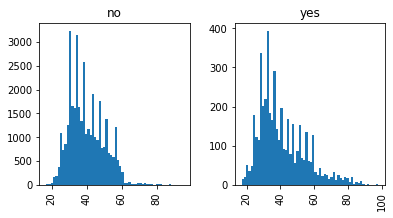

In [37]:
data.hist(column='age',by='y',bins=60,figsize=(6,3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7486d4eac8>,
      dtype=object)

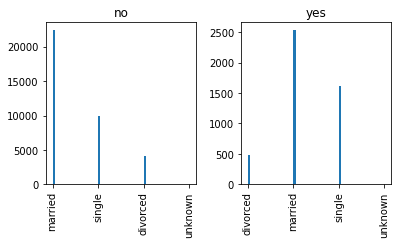

In [41]:
data.hist(column='marital',by='y',bins=60,figsize=(6,3))

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le2 = LabelEncoder()
data['y'] = le2.fit_transform(data['y'])

In [48]:
le1 = LabelEncoder()
data['marital'] = le2.fit_transform(data['marital'])

In [54]:
le3 = LabelEncoder()
data['job'] = le2.fit_transform(data['job'])

In [55]:
le4= LabelEncoder()
data['education'] = le2.fit_transform(data['education'])

In [58]:
le5= LabelEncoder()
data['housing'] = le2.fit_transform(data['housing'])

In [59]:
le6= LabelEncoder()
data['loan'] = le2.fit_transform(data['loan'])

In [64]:
le7= LabelEncoder()
data['contact'] = le2.fit_transform(data['contact'])

In [65]:
le8= LabelEncoder()
data['day_of_week'] = le2.fit_transform(data['day_of_week'])

In [66]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,no,0,0,1,may,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,unknown,0,0,1,may,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,no,2,0,1,may,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,no,0,0,1,may,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,no,0,2,1,may,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,no,2,0,0,nov,0,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,no,0,0,0,nov,0,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,no,2,0,0,nov,0,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,no,0,0,0,nov,0,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = data[['age', 'job', 'marital', 'education','housing', 'loan',
       'contact', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']]
y = data['y']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [69]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()



In [70]:
clf.fit(X_train , y_train)
pred = clf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10956
           1       0.67      0.50      0.57      1401

    accuracy                           0.92     12357
   macro avg       0.80      0.73      0.76     12357
weighted avg       0.91      0.92      0.91     12357

